<h1>Extracting and Visualizing Stock Data</h1>



<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [112]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/r/linux-64          [>                   ] (--:--) No change
pkgs/r/linux-64 

In [113]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In [114]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [115]:
tesla = yf.Ticker("TSLA")

In [116]:
tesla_info = tesla.info
tesla_info

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [117]:
tesla_data = tesla.history(period="max")

In [118]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [119]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [120]:
soup = BeautifulSoup(data, "html.parser")


In [121]:
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
revenue_table = soup.find_all('tbody')[1]

# first we isolate the body of the table which contains all the information
# then we loop through each row and find all the columns values for each row
for rows in revenue_table.find_all('tr'):
    col = rows.find_all('td')
    date = col[0].text
    revenue = col[1].text
    
    # finally we append the data of each row to the table
    tesla_revenue = tesla_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index = True)
    

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [122]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



Execute the following lines to remove an null or empty strings in the Revenue column.


In [123]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [124]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [125]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [126]:
gme = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [127]:
gme_data = gme.history(period = 'max')

In [128]:
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [129]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [130]:
soup = BeautifulSoup(data, 'html5lib')

In [131]:
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
revenue_table = soup.find_all('tbody')[1]

# first we isolate the body of the table which contains all the information
# then we loop through each row and find all the columns values for each row
for rows in revenue_table.find_all('tr'):
    col = rows.find_all('td')
    date = col[0].text
    revenue = col[1].text
    
    # finally we append the data of each row to the table
    gme_revenue = tesla_revenue.append({'Date': date, 'Revenue': revenue}, ignore_index = True)
    


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [132]:
gme_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [133]:
gme_revenue.tail()

,Date,Revenue
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27
53,2005-01-31,$709


In [134]:
def make_graph(tesla_data, tesla_revenue, Tesla):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    tesla_data_specific = tesla_data[tesla_data.Date <= '2021--06-14']
    tesla_revenue_specific = tesla_revenue[tesla_revenue.Date <= '2021-06-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(tesla_data_specific.Date, infer_datetime_format=True), y=tesla_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(tesla_revenue_specific.Date, infer_datetime_format=True), y=tesla_revenue_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=Tesla,
    xaxis_rangeslider_visible=True)
    fig.show()

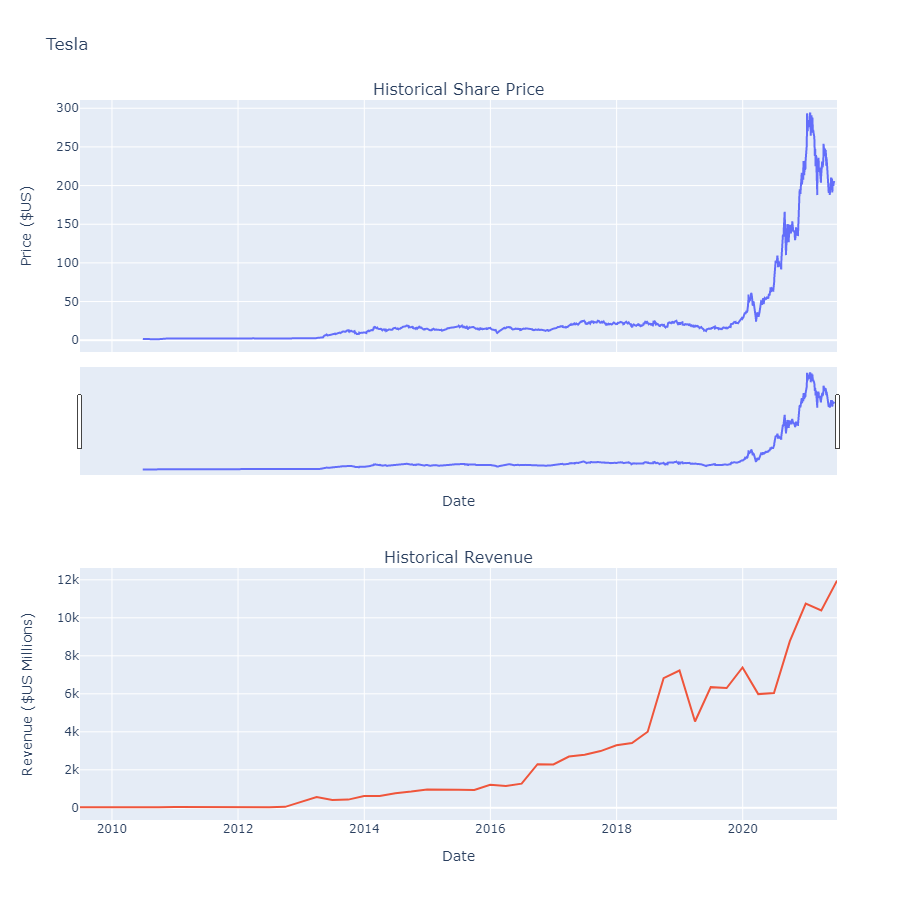

In [135]:
make_graph(tesla_data, tesla_revenue, 'Tesla')